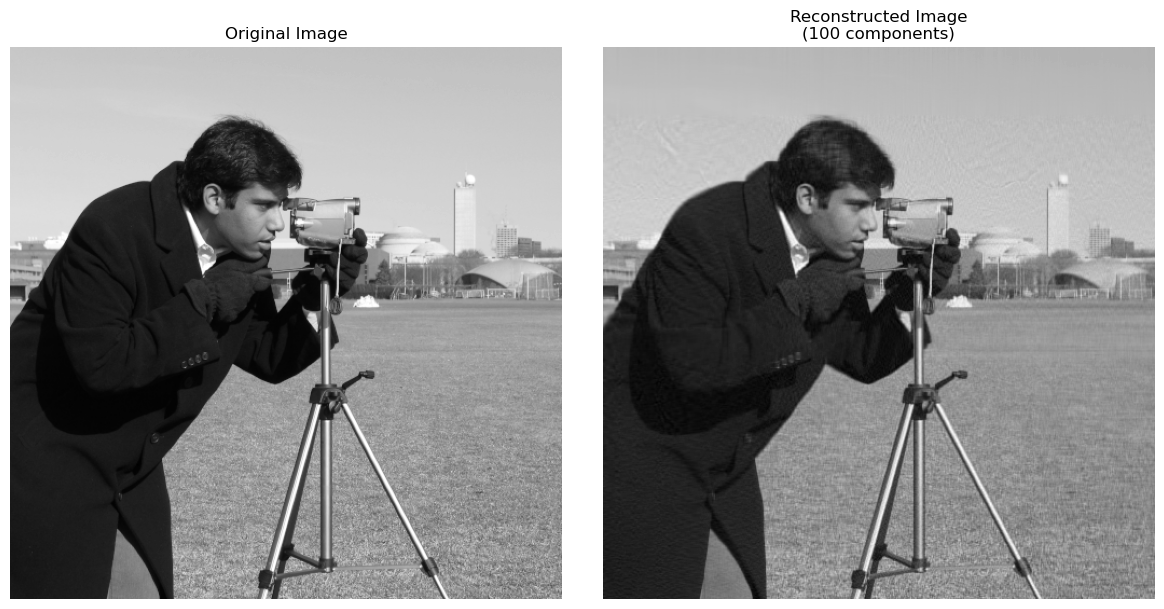

Compression ratio: 0.32
Explained variance ratio: 0.99


In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from skimage import data

image = data.camera()

X = image.reshape(-1, image.shape[1])

n_components = 100  
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)

image_reconstructed = X_reconstructed.reshape(image.shape)

original_size = image.nbytes
compressed_size = X_pca.nbytes + pca.components_.nbytes
compression_ratio = original_size / compressed_size

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
ax1.imshow(image, cmap='gray')
ax1.set_title('Original Image')
ax1.axis('off')
ax2.imshow(image_reconstructed, cmap='gray')
ax2.set_title(f'Reconstructed Image\n({n_components} components)')
ax2.axis('off')
plt.tight_layout()
plt.show()

print(f"Compression ratio: {compression_ratio:.2f}")
print(f"Explained variance ratio: {np.sum(pca.explained_variance_ratio_):.2f}")